# Google Analytics Revenue Prediction

## Model Selection - Regression

**Environment**

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Pandas defaults
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
 
# Make jupyter bigger
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:100% !important; }</style>'))

In [2]:
from myfunctions import *

**Import Dataframe**

In [3]:
df = pd.read_csv("data/df5-2.csv", low_memory=False)

In [4]:
df.shape

(903455, 50)

In [5]:
df.head()

,channel_direct,channel_organic,channel_other,channel_paid,browser_android,browser_chrome,browser_firefox,browser_microsoft,browser_other,cat_desktop,cat_mobile,os_Android,os_Macintosh,os_Windows,os_iOS,continet_Africa,continet_Americas,continet_Asia,continet_Europe,continet_Oceania,ad_GoogleMerchandiseCollection,ad_NoAd,network_Google Search,network_NoAdWords,campaign_AW,campaign_Data Share,campaign_NoCampaign,medium_affiliate,medium_cpc,medium_cpm,medium_none,medium_organic,medium_other,referral_Google,referral_Home,referral_NoReferral,referral_Youtube,source_Google,source_Googleplex,source_Youtube,source_direct,visitNumber,deviceIsMobile,totalsBounces,totalsNewVisits,totalsPageviews,adwordsClickGclId,trafficSourceIsTrueDirect,newRandom,newRevenueDoll
0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0.581066,0.0
1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0.476443,0.0
2,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0.502763,0.0
3,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0.735265,0.0
4,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,2,1,1,0,1,0,1,0.238397,0.0


In [6]:
df.columns

Index(['channel_direct', 'channel_organic', 'channel_other', 'channel_paid',
       'browser_android', 'browser_chrome', 'browser_firefox',
       'browser_microsoft', 'browser_other', 'cat_desktop', 'cat_mobile',
       'os_Android', 'os_Macintosh', 'os_Windows', 'os_iOS', 'continet_Africa',
       'continet_Americas', 'continet_Asia', 'continet_Europe',
       'continet_Oceania', 'ad_GoogleMerchandiseCollection', 'ad_NoAd',
       'network_Google Search', 'network_NoAdWords', 'campaign_AW',
       'campaign_Data Share', 'campaign_NoCampaign', 'medium_affiliate',
       'medium_cpc', 'medium_cpm', 'medium_none', 'medium_organic',
       'medium_other', 'referral_Google', 'referral_Home',
       'referral_NoReferral', 'referral_Youtube', 'source_Google',
       'source_Googleplex', 'source_Youtube', 'source_direct', 'visitNumber',
       'deviceIsMobile', 'totalsBounces', 'totalsNewVisits', 'totalsPageviews',
       'adwordsClickGclId', 'trafficSourceIsTrueDirect', 'newRandom',
       

### Model Selection

In the model selection process I will take into account:<br>
    1.- It is a logistic regresion problem<br>
    2.- The data is Sparse<br>
    3.- The target is very unbalanced (1,29% with revenue > o vs 98,71% revenue 0)<br>
    4.- There is a lot of data 903455 rows and 50 columns<br>

**CONCLUSIONS:**<br>
1.- I'll use a linear gregression model<br>
2.- I'll use Root Mean Squared Error<br>
3.- If it doesn't work, I'll try to balance the classes down sampling the data<br>


### Linear Regression

#### Split dataframe

In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#### Model


In [9]:
linreg = LinearRegression()

In [10]:
#Current parameters of Logistic regression
print(linreg.get_params())

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


In [11]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
print('Intercept: {}'.format(linreg.intercept_))
print ('')
print('Coef : {}'.format(linreg.coef_))

Intercept: [-0.58084327]

Coef : [[ 7.35317398e+11  5.26733398e-02  4.98146348e-02  3.28429381e-02
   7.75220394e-02  4.38543923e-02  5.11928565e-02  7.67178472e-02
   6.45107309e-02 -1.52147479e-02  2.57973927e-02 -7.86621245e-02
   1.22577244e-01  2.49733701e-02 -2.87207279e-02 -5.04331422e-02
   2.43205442e-02 -7.51392670e-02 -7.40575389e-02 -1.04267772e-01
   2.83114845e-02 -6.03139038e-02  1.67328344e-02  1.87383371e-01
   1.08613996e-01  5.17683068e-02  9.81794110e-02  6.25543633e-02
  -1.40947963e-02 -4.96857495e-03 -7.35317398e+11  5.50341692e-02
   1.65500175e-02  7.39561723e-03  7.65204985e-02 -4.46088267e-02
   9.66352860e-03 -2.58363893e-02  5.62605505e-01  8.73996049e-02
   8.92244327e-02 -2.34089795e-03 -4.06015813e-03  2.95195077e-01
  -2.13676651e-01  1.15254822e-01  2.13741766e-01  3.37773712e-02
   7.33580093e-03]]


In [13]:
y_train_pred = linreg.predict(X_train)

In [14]:
y_pred = linreg.predict(X_test)

In [15]:
r2_score(y_train, y_train_pred)

0.17395376448022715

In [16]:
r2_score(y_test, y_pred)

0.1856815132143439

In [17]:
mean_squared_error(y_train, y_train_pred)

3.3067457230962414

In [18]:
mean_squared_error(y_test, y_pred)

3.3111727753800038

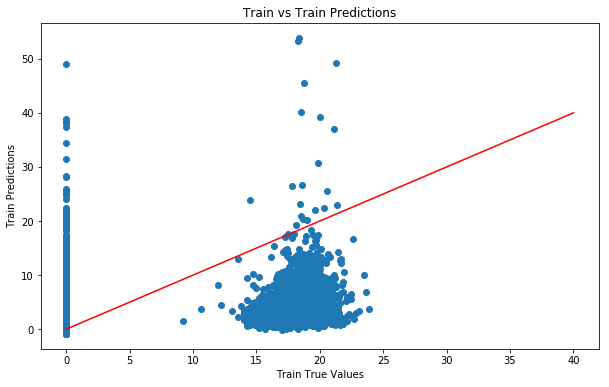

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(y_train, y_train_pred)
plt.plot([0,40],[0,40], color='red')
plt.xlabel('Train True Values')
plt.ylabel('Train Predictions')
plt.title('Train vs Train Predictions')
plt.show()

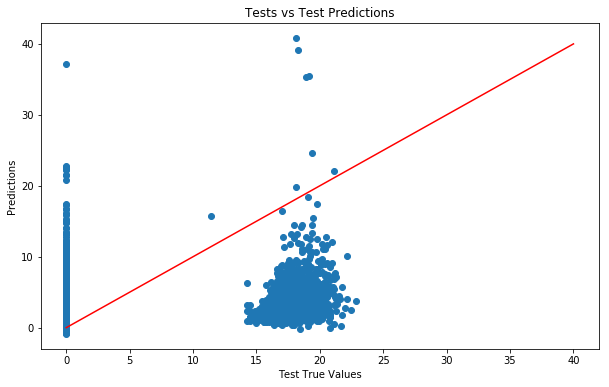

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([0,40],[0,40], color='red')
plt.xlabel('Test True Values')
plt.ylabel('Predictions')
plt.title('Tests vs Test Predictions')
plt.show()

**CONCLUSIONS:**<br>
* The R2 and RSME have given very bad results.<br>

**IMPROVEMENTS:**<br>
* Downsample to equal the 0 value and the >0 rowns in the target.
* Improve the hyperparameter optimization of the model.
* Standarize the df to equal the vars range
* Take out the columns that perform under the random var

### Down sampling the dataframe

I'll separate observations from each class into different DataFrames.


In [21]:
# Separate majority and minority classes
df_majority = df[df.newRevenueDoll==0]
df_minority = df[df.newRevenueDoll!=0]

In [22]:
df_majority.shape

(891940, 50)

In [23]:
df_minority.shape

(11515, 50)

I'll resample the majority class without replacement, setting the number of samples to match that of the minority class.


In [24]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=11515,     # to match minority class
                                 random_state=123) # reproducible results
 

I'll combine the down-sampled majority class DataFrame with the original minority class DataFrame.

In [25]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])


In [26]:
df_downsampled.loc[df_downsampled.newRevenueDoll==0].count()[0]

11515

In [27]:
df_downsampled.loc[df_downsampled.newRevenueDoll!=0].count()[0]

11515

In [28]:
df_downsampled.shape

(23030, 50)

In [29]:
df_downsampled.isnull().sum().sum()

0

In [30]:
df_downsampled.to_csv("data/df5_2-downsampled.csv",index=False)

#### Split dataframe

In [31]:
X = df_downsampled.iloc[:,:-1]
y = df_downsampled.iloc[:,-1:]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#### Model


In [33]:
linreg = LinearRegression()

In [34]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
print('Intercept: {}'.format(linreg.intercept_))
print ('')
print('Coef : {}'.format(linreg.coef_))

Intercept: [1.63211358]

Coef : [[-5.43787239e+12 -3.62524826e+11  6.05298463e-02 -5.43787239e+11
   8.67585500e-01  6.28851910e-01  5.31485981e-01  1.22759459e+00
   2.37361552e-01  2.87909531e+00 -6.52166945e-01 -2.13089226e+00
   7.29561715e-01 -3.81279841e-01 -1.73470158e+00 -2.92209068e+00
   7.58596678e-02 -3.28388993e+00 -3.82502469e+00 -3.93870993e+00
   2.39767985e+00  6.88135402e-01 -1.81248441e+00  1.81236997e+00
  -1.81213346e+00  3.40619438e+00  1.09458567e-01 -1.81262413e+11
  -1.81262413e+11 -1.81262413e+11  2.35641137e+12 -3.62524826e+11
  -7.25049652e+11  7.35469024e-01  4.95047457e-01  7.25049652e+11
  -1.93395287e+00 -1.59728612e-03  3.18449885e+00  1.55150035e+00
   2.35641137e+12 -8.67798258e-04  3.50877062e+00 -4.21800054e+00
  -2.27816777e+00  1.69629834e-01  7.97228112e+00  1.73606979e-01
  -3.63064047e-02]]


In [36]:
y_train_pred = linreg.predict(X_train)

In [37]:
y_pred = linreg.predict(X_test)

In [38]:
r2_score(y_train, y_train_pred)

0.6245920915551146

In [39]:
r2_score(y_test, y_pred)

0.6258475512841938

In [40]:
mean_squared_error(y_train, y_train_pred)

30.095118829902724

In [41]:
mean_squared_error(y_test, y_pred)

29.946730519803577

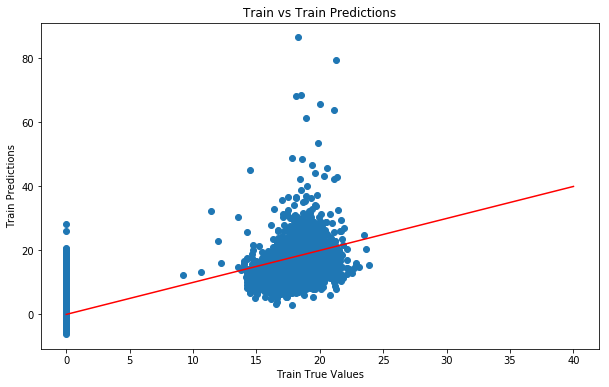

In [42]:
plt.figure(figsize=(10,6))
plt.scatter(y_train, y_train_pred)
plt.plot([0,40],[0,40], color='red')
plt.xlabel('Train True Values')
plt.ylabel('Train Predictions')
plt.title('Train vs Train Predictions')
plt.show()

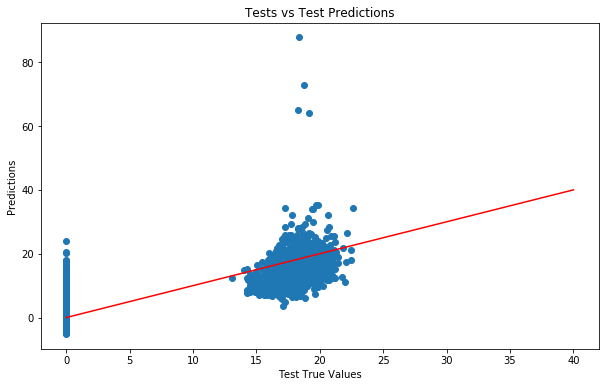

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([0,40],[0,40], color='red')
plt.xlabel('Test True Values')
plt.ylabel('Predictions')
plt.title('Tests vs Test Predictions')
plt.show()

### Standarize the dataframe

#### Split dataframe

In [44]:
X = df_downsampled.iloc[:,:-1]
y = df_downsampled.iloc[:,-1:]

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#### Standarize the dataframe

In [46]:
# Define the scaler with the Train data 
scaler = StandardScaler().fit(X_train)

In [47]:
# Scale the train set
X_train = scaler.transform(X_train)

In [48]:
# Scale the test set
X_test = scaler.transform(X_test)

In [49]:
# Define the scaler with the Train data 
t_scaler = StandardScaler().fit(y_train)

In [50]:
y_train = t_scaler.transform(y_train)

In [51]:
y_test = t_scaler.transform(y_test)

**How to reverse**

target_inverse = t_scaler.inverse_transform(y_pred)

#### Model


In [52]:
linreg = LinearRegression()

In [53]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [54]:
print('Intercept: {}'.format(linreg.intercept_))
print ('')
print('Coef : {}'.format(linreg.coef_))

Intercept: [-9.66256182e-05]

Coef : [[ 1.16073222e+11 -1.77952541e+12  6.76378831e-03 -2.18314259e+12
   6.54009127e-03  2.73106995e-02  9.35133633e-03  1.66333375e-02
   2.92076702e-03  1.22133404e-01 -2.68175231e-02 -6.78533729e-02
   3.98646677e-02 -1.92386796e-02 -5.39947293e-02 -2.86488140e-02
   5.72556875e-03 -1.22485777e-01 -1.33900020e-01 -4.07312052e-02
   2.09205036e-02  6.10308647e-03 -7.42988177e+10 -6.35639979e+11
  -5.61341161e+11  3.97088186e-02  6.05201957e-03  7.94745390e+11
   1.42691822e+12  7.86239501e+11 -4.37812232e+11  9.31396347e+11
  -2.60596178e+10  6.00022790e-03  2.49881796e-02  8.72402695e+11
  -7.10607826e-02 -8.17064065e-04  1.54100608e-01  5.43738236e-02
  -3.43092548e+11 -1.52293573e-03  1.49416275e-01 -2.02835019e-01
  -1.24530426e-01  3.75608410e-01  1.54053743e-01  1.16613868e-02
  -1.36622665e-03]]


In [55]:
y_train_pred = linreg.predict(X_train)

In [56]:
y_pred = linreg.predict(X_test)

In [57]:
r2_score(y_train, y_train_pred)

0.6243897241705021

In [58]:
r2_score(y_test, y_pred)

0.6259089167159118

In [59]:
mean_squared_error(y_train, y_train_pred)

0.3756102758294979

In [60]:
mean_squared_error(y_test, y_pred)

0.3734956380251125

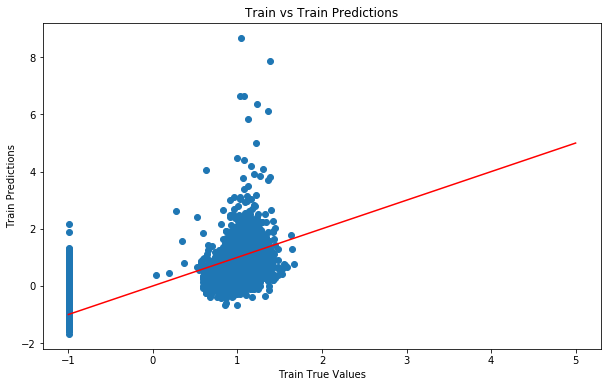

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(y_train, y_train_pred)
plt.plot([-1,5],[-1,5], color='red')
plt.xlabel('Train True Values')
plt.ylabel('Train Predictions')
plt.title('Train vs Train Predictions')
plt.show()

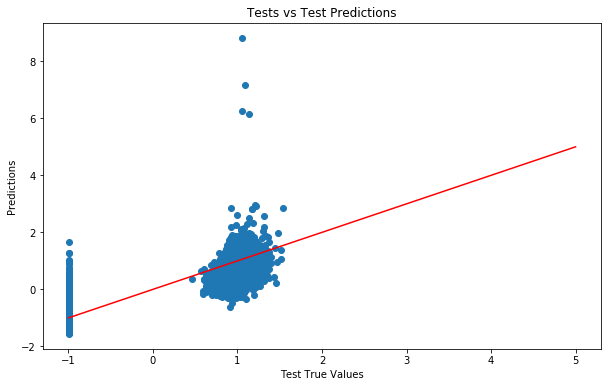

In [62]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([-1,5],[-1,5], color='red')
plt.xlabel('Test True Values')
plt.ylabel('Predictions')
plt.title('Tests vs Test Predictions')
plt.show()

### Random Forest Regression

#### Split dataframe

In [63]:
df_downsampled.shape

(23030, 50)

In [64]:
X = df_downsampled.iloc[:,:-1]
y = df_downsampled.iloc[:,-1:]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [66]:
X_train.shape

(18424, 49)

In [67]:
y_train.shape

(18424, 1)

In [68]:
X_test.shape

(4606, 49)

In [69]:
y_test.shape

(4606, 1)

#### Model


In [70]:
regr = RandomForestRegressor(max_depth=9, random_state=10, n_estimators=40)

In [71]:
regr.fit(X_train, y_train)  

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=40,
                      n_jobs=None, oob_score=False, random_state=10, verbose=0,
                      warm_start=False)

In [72]:
y_train_pred = regr.predict(X_train)

In [73]:
y_pred = regr.predict(X_test)

In [74]:
print(regr.feature_importances_)

[5.45819227e-04 9.83647228e-04 4.52553383e-04 3.73322713e-04
 6.64195058e-06 1.22795088e-03 5.58216862e-04 6.57280040e-04
 2.43038990e-04 1.94076170e-03 8.84737998e-04 4.32920789e-04
 2.30445060e-03 7.63231417e-04 8.51321119e-04 1.14875554e-04
 2.51776608e-02 5.08381667e-04 5.36949419e-04 1.17581015e-04
 2.21561822e-04 5.61858098e-05 2.82563502e-05 3.22185780e-05
 3.97265918e-05 9.97469616e-05 3.25177923e-05 1.25712159e-04
 2.72214692e-05 4.18610767e-04 5.94587256e-04 7.85434591e-04
 0.00000000e+00 2.48377557e-04 6.25064573e-04 7.25528867e-04
 1.35375709e-03 2.34095568e-03 1.41929916e-03 4.57026738e-04
 5.67941429e-04 1.12024836e-02 1.21357101e-03 7.69097841e-06
 6.23198258e-03 9.12453309e-01 2.59131295e-05 1.84066823e-03
 1.81433070e-02]


In [75]:
r2_score(y_train, y_train_pred)

0.8927607287894227

In [76]:
r2_score(y_test, y_pred)

0.8677888237662877

In [77]:
mean_squared_error(y_train, y_train_pred)

8.596991532980214

In [78]:
mean_squared_error(y_test, y_pred)

10.582030078826469

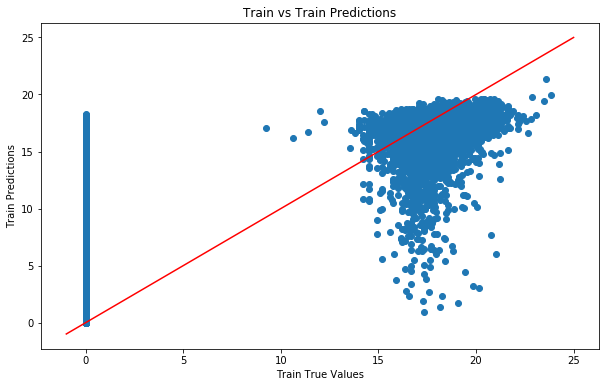

In [79]:
plt.figure(figsize=(10,6))
plt.scatter(y_train, y_train_pred)
plt.plot([-1,25],[-1,25], color='red')
plt.xlabel('Train True Values')
plt.ylabel('Train Predictions')
plt.title('Train vs Train Predictions')
plt.show()

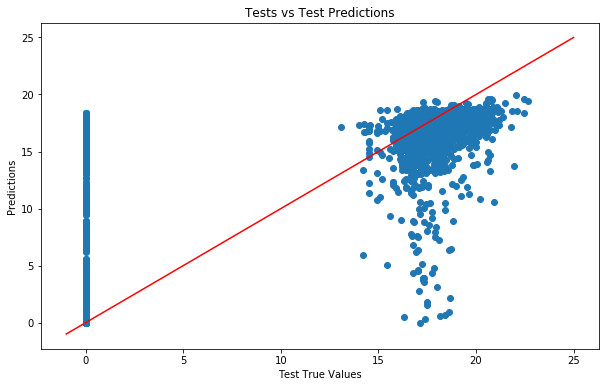

In [80]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([-1,25],[-1,25], color='red')
plt.xlabel('Test True Values')
plt.ylabel('Predictions')
plt.title('Tests vs Test Predictions')
plt.show()

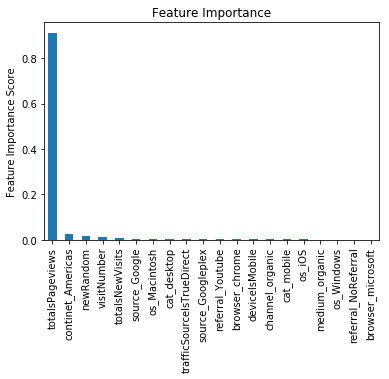

In [81]:
plot_feat_imp(regr,20,df_downsampled.columns)

In [82]:
print_feat_imp(regr,df_downsampled)

,Importance,Feature
0,0.9125,totalsPageviews
1,0.0252,continet_Americas
2,0.0181,newRandom
3,0.0112,visitNumber
4,0.0062,totalsNewVisits
5,0.0023,source_Google
6,0.0023,os_Macintosh
7,0.0019,cat_desktop
8,0.0018,trafficSourceIsTrueDirect
9,0.0014,source_Googleplex
